# Unit 5 - Financial Planning

In [134]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date, timedelta

%matplotlib inline

In [135]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [136]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [137]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
#btc_response_data = requests.get(btc_url, verify = False)
#btc_response_data = requests.get(btc_url).json()

In [138]:
# Fetch current BTC price
# YOUR CODE HERE!
# send the get request for Bitcoin and Ethereum
btc_response_data = requests.get(btc_url).json()


# Initial json parse
#print(btc_response_data)           # print the json response returned.
#print(type(btc_response_data))     # dict type
#print(len(btc_response_data))      # check the len 

# look at the 1st dict element
#print(btc_response_data['data'])
#print(type(btc_response_data['data']))     # another dict type
#print(len(btc_response_data['data']))      # check the len 

# look at the '1' dict element
#print(btc_response_data['data']['1'])
#print(type(btc_response_data['data']['1']))     # another dict type
#print(len(btc_response_data['data']['1']))      # check the len 

# look at the 'quotes' key as price is embedded there
# print(btc_response_data['data']['1']['quotes'])
# print(type(btc_response_data['data']['1']['quotes']))     
# print(len(btc_response_data['data']['1']['quotes']))      # check the len 

# look at the 'USD' key as price is embedded there
# print(btc_response_data['data']['1']['quotes']['USD'])
# print(type(btc_response_data['data']['1']['quotes']['USD']))     
# print(len(btc_response_data['data']['1']['quotes']['USD']))      # check the len 

btc_price = btc_response_data['data']['1']['quotes']['USD']['price']
print('Current BTC price = ', btc_price)
my_btc_value = my_btc * btc_price

# Fetch current ETH price
# YOUR CODE HERE!
eth_response_data = requests.get(eth_url).json()
#print(eth_response_data['data']['1027'])
eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']
print('Current ETH price = ',eth_price)
my_eth_value = my_eth * eth_price

# Compute current value of my crpto
# YOUR CODE HERE!

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

Current BTC price =  49438.0
Current ETH price =  3888.17
The current value of your 1.2 BTC is $59325.60
The current value of your 5.3 ETH is $20607.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [139]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [140]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [141]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.to_datetime("today")                   
#print(date.today())
end = pd.Timestamp(today, tz="America/New_York").isoformat()

end1500 = (today - timedelta(days=1500)).isoformat()             # include more days as weekend are there.
start = pd.Timestamp(end1500, tz="America/New_York").isoformat()
print('start = ',start)
print('end = ', end)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    limit = 1000,
    start = start,
    end = end
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.sort_index
df_portfolio.tail()

start =  2017-04-06T23:39:06.364327-04:00
end =  2021-05-15T23:39:06.364327-04:00


AGG                                        \
                             open    high       low    close     volume   
2021-05-10 00:00:00-04:00  114.61  114.72  114.4000  114.430  4737895.0   
2021-05-11 00:00:00-04:00  114.23  114.38  114.1300  114.190  5986487.0   
2021-05-12 00:00:00-04:00  113.98  114.01  113.7900  113.790  6392314.0   
2021-05-13 00:00:00-04:00  113.90  114.06  113.7800  114.015  5446892.0   
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.280  3711363.0   

                              SPY                                       
                             open    high     low   close       volume  
2021-05-10 00:00:00-04:00  422.50  422.74  417.81  417.98   72071656.0  
2021-05-11 00:00:00-04:00  413.10  415.27  410.06  414.27  105794428.0  
2021-05-12 00:00:00-04:00  411.23  412.59  404.00  405.44  117671634.0  
2021-05-13 00:00:00-04:00  407.07  412.35  407.02  410.26   96561623.0  
2021-05-14 00:00:00-04:00  413.20  417.49  413.18  416.53   69029028.0

In [142]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
len(df_portfolio)
current_day = df_portfolio.iloc[len(df_portfolio)-1]
agg_close_price = current_day["AGG"]["close"]
spy_close_price = current_day["SPY"]["close"]
#spy_close_price = df_portfolio["SPY"]["close"]
#type(agg_close)
#print(agg_close)
#print(f"Current AGG closing price: ${agg_close}")

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [143]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22856.00
The current value of your 50 SPY shares is $20826.50


In [144]:
#data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
#>>> pd.DataFrame.from_dict(data)

### Savings Health Analysis

In [145]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value
# Create savings DataFrame
# YOUR CODE HERE!
savings = {'amount' : [total_crypto_value, total_shares_value]}


#d_savings = { 'crypto' : [total_crypto_value], 'shares' : [total_shares_value]}
#print(d_savings)
df_savings = pd.DataFrame(savings, index= ['crypto', 'shares']) 
# Display savings DataFrame
display(df_savings)
type(df_savings)

,amount
crypto,79932.901
shares,43682.500


pandas.core.frame.DataFrame

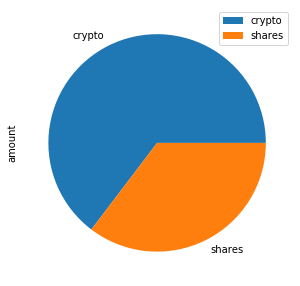

In [146]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount', figsize=(5, 5))

In [147]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
#print(emergency_fund)
#print('Emergency Fund = ', emergency_fund)
# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.sum()[0]
#print('total savings = ', total_savings)
#print(type(total_savings))
# Validate saving health
# YOUR CODE HERE!

if ( total_savings > emergency_fund ):
    print(f'Congratulations you have enough savings = {total_savings} more than emergency funds = {emergency_fund}')
elif total_savings == emergency_fund:
    print(f'Congratulations on reaching enough savings = {total_savings} as emergency fund needed = {emergency_fund}')
else:
    print(f'Your savings = {total_savings} are less than emergency funds = {emergency_fund}')

Congratulations you have enough savings = 123615.401 more than emergency funds = 36000


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [148]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

# We already have 4 yrs data frmo earlier call. so now we just need 1 more year prior to that. Set the dates here
start_date = pd.Timestamp('2016-05-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2017-05-23', tz='America/New_York').isoformat()

# We already have 4 yrs data frmo earlier call to Alpaca. Confirm by printing head and tail
print(df_portfolio.head())      # we have data from 2017-05-24.
print(df_portfolio.tail())      # we haev data till 2021-05-14 



                              AGG                                        \
                             open    high       low    close     volume   
2017-05-24 00:00:00-04:00  109.25  109.50  109.2115  109.450  2325960.0   
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257.0   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245.0   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625.0   
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.750  2011554.0   

                              SPY                                      
                             open    high     low   close      volume  
2017-05-24 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-05-25 00:00:00-04:00  241.20  242.08  240.96  241.71  45278321.0  
2017-05-26 00:00:00-04:00  241.55  241.90  241.45  241.74  30002081.0  
2017-05-30 00:00:00-04:00  241.33  241.79  241.16  241.52  28437351.0  
2017-05-31 00:00:00-04:00  241.84  241.88 

In [149]:
# get the remaining 1 year.
df_portfolio_rest = alpaca.get_barset(
    tickers,
    timeframe,
    limit = 1000,
    start = start_date,
    end = end_date
).df
# print to check the new 1 year data extra
print(df_portfolio_rest.head())
print(df_portfolio_rest.tail())

                              AGG                                       \
                             open    high       low     close   volume   
2016-05-24 00:00:00-04:00  110.56  110.56  110.3400  110.4450  1554835   
2016-05-25 00:00:00-04:00  110.54  110.55  110.3899  110.4759  2518214   
2016-05-26 00:00:00-04:00  110.64  110.73  110.5600  110.6300  1410096   
2016-05-27 00:00:00-04:00  110.68  110.70  110.4800  110.6100  2058598   
2016-05-31 00:00:00-04:00  110.41  110.76  110.3600  110.6600  3066570   

                              SPY                                      
                             open    high     low     close    volume  
2016-05-24 00:00:00-04:00  206.17  208.24  206.14  207.8500  65705751  
2016-05-25 00:00:00-04:00  208.67  209.77  208.62  209.2200  59678561  
2016-05-26 00:00:00-04:00  209.44  209.71  208.97  209.3264  41187181  
2016-05-27 00:00:00-04:00  209.53  210.21  209.47  210.2000  48878450  
2016-05-31 00:00:00-04:00  210.55  210.69  209.18

In [150]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# here concatenate the 4 yrs we aleady got earlier and then the 1 year now. 
df_stock_data = pd.concat([df_portfolio_rest, df_portfolio], axis="rows", join="inner")
# sort by date index to get all the 5 years in sequence
df_stock_data.sort_index
# Display sample data
print(df_stock_data.head())
print(df_stock_data.tail())
print(f'Total days of data = {len(df_stock_data)}')       # Confirm we have the 5 yrs data

                              AGG                                         \
                             open    high       low     close     volume   
2016-05-24 00:00:00-04:00  110.56  110.56  110.3400  110.4450  1554835.0   
2016-05-25 00:00:00-04:00  110.54  110.55  110.3899  110.4759  2518214.0   
2016-05-26 00:00:00-04:00  110.64  110.73  110.5600  110.6300  1410096.0   
2016-05-27 00:00:00-04:00  110.68  110.70  110.4800  110.6100  2058598.0   
2016-05-31 00:00:00-04:00  110.41  110.76  110.3600  110.6600  3066570.0   

                              SPY                                        
                             open    high     low     close      volume  
2016-05-24 00:00:00-04:00  206.17  208.24  206.14  207.8500  65705751.0  
2016-05-25 00:00:00-04:00  208.67  209.77  208.62  209.2200  59678561.0  
2016-05-26 00:00:00-04:00  209.44  209.71  208.97  209.3264  41187181.0  
2016-05-27 00:00:00-04:00  209.53  210.21  209.47  210.2000  48878450.0  
2016-05-31 00:00:00-04:

In [151]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# use limit=1000 to call the most recent 1000 days of data
# YOUR CODE HERE!

# Configure a Monte Carlo simulation to forecast five years cumulative returns  # Fitst one is 30 yrs Simulation not 5
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6 ],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [152]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                         \
                             open    high       low     close     volume   
2016-05-24 00:00:00-04:00  110.56  110.56  110.3400  110.4450  1554835.0   
2016-05-25 00:00:00-04:00  110.54  110.55  110.3899  110.4759  2518214.0   
2016-05-26 00:00:00-04:00  110.64  110.73  110.5600  110.6300  1410096.0   
2016-05-27 00:00:00-04:00  110.68  110.70  110.4800  110.6100  2058598.0   
2016-05-31 00:00:00-04:00  110.41  110.76  110.3600  110.6600  3066570.0   

                                           SPY                            \
                          daily_return    open    high     low     close   
2016-05-24 00:00:00-04:00          NaN  206.17  208.24  206.14  207.8500   
2016-05-25 00:00:00-04:00     0.000280  208.67  209.77  208.62  209.2200   
2016-05-26 00:00:00-04:00     0.001395  209.44  209.71  208.97  209.3264   
2016-05-27 00:00:00-04:00    -0.000181  209.53  210.21  209.47  210.2000   
2016-05-31 00:00:00-04:00     0.000452  210.55  210.69  209.18  209.9000   

                                                    
                               volume daily_return  
2016-05-24 00:00:00-04:00  65705751.0          NaN  
2016-05-25 00:00:00-04:00  59678561.0     0.006591  
2016-05-26 00:00:00-04:00  41187181.0     0.000509  
2016-05-27 00:00:00-04:00  48878450.0     0.004173  
2016-05-31 00:00:00-04:00  74321735.0    -0.001427

In [153]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012987,1.007432,1.003798,0.995084,0.985326,1.005225,0.996659,0.999788,1.000997,1.015238,...,1.009426,0.997312,0.999597,0.990682,0.997223,1.005299,1.009054,1.010375,1.003609,0.989266
2,1.026658,1.000096,1.012876,0.999764,0.981694,1.004453,0.992475,0.994450,1.004251,1.007520,...,1.000316,1.000957,1.011374,1.000957,0.999953,1.001914,1.018510,1.008812,0.989073,0.990648
3,1.025409,0.997135,1.016941,1.003833,0.976836,0.998012,0.995928,0.977655,1.000187,1.006769,...,1.005315,0.996656,1.016098,0.995719,1.003037,1.009165,1.023174,0.993954,0.988107,0.987778
4,1.034173,1.008562,1.020133,0.999502,0.980318,0.988361,0.994575,0.978573,0.989501,0.998177,...,0.993811,0.996824,1.020125,0.988793,1.002316,1.006516,1.034466,1.010582,0.982132,0.994991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.889575,20.747579,18.868194,2.978755,11.379987,7.366937,9.316835,12.310676,49.526246,12.640226,...,18.077388,6.110770,11.370141,16.292990,3.411775,16.478035,14.703550,19.942967,21.817121,9.113696
7557,20.664136,20.805545,18.839444,2.961934,11.373273,7.365420,9.302248,12.244674,49.459562,12.670105,...,18.113796,6.101389,11.311338,16.426796,3.415174,16.296435,14.855281,20.269322,21.922897,9.136042
7558,20.577486,20.865864,19.167008,2.917155,11.334499,7.300854,9.308729,12.134787,49.654854,12.736098,...,17.866148,6.136998,11.293458,16.228484,3.385620,16.288434,14.730978,20.257298,22.029289,9.230232
7559,20.578284,21.006866,19.364135,2.937516,11.382690,7.331534,9.315764,12.206157,49.168991,12.557426,...,18.033872,6.177632,11.216800,16.177008,3.402314,16.207030,14.858394,20.221072,22.119017,9.224862


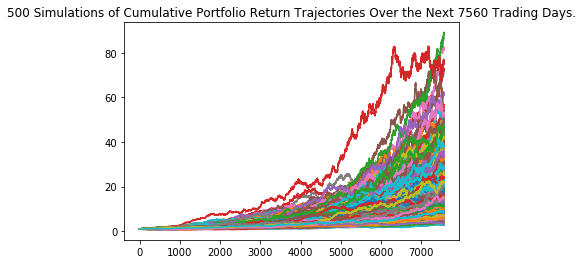

In [154]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

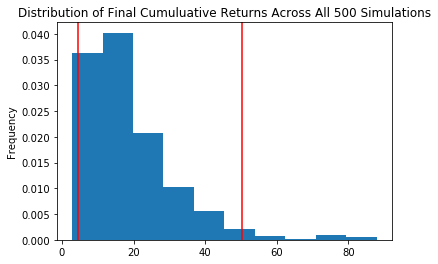

In [155]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [156]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean             18.902535
std              12.724115
min               2.851922
25%              10.137302
50%              15.764265
75%              23.662247
max              87.855818
95% CI Lower      4.420092
95% CI Upper     50.234227
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [157]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $88401.83 and $1004684.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [158]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $132602.75 and $1507026.8


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [159]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
# increase SPY weights to 75%
MC_even_dist_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80 ],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [160]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.020673,1.008956,0.983315,0.993286,1.007641,1.008007,1.004673,0.999026,1.004472,0.984681,...,0.999892,1.017741,1.017681,1.012980,1.008720,1.006309,1.003062,0.992636,1.014662,0.997598
2,1.029691,1.017470,0.985152,0.994108,1.028041,1.012735,1.008295,0.994587,1.004707,0.980056,...,0.999064,1.008521,1.022558,1.012881,1.004500,0.999503,1.013896,0.991807,1.012197,0.999191
3,1.021617,1.025865,0.991688,0.993939,1.001659,1.016474,1.016010,1.001975,0.991752,0.983789,...,1.021680,1.011426,1.032151,1.009314,0.989072,0.983979,1.031364,0.995547,1.010626,1.002901
4,1.019399,1.033682,0.992749,0.988237,0.996679,1.001598,1.027562,0.996347,1.006237,0.981729,...,1.036781,1.013301,1.028975,1.016583,0.992838,0.967009,1.039785,0.994875,1.012359,0.995547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.918457,2.643962,1.362066,1.307186,2.415817,1.555102,1.459388,0.820443,0.929877,1.637274,...,1.921574,2.900719,1.497393,1.347160,2.516155,2.154150,1.716595,2.445541,2.860949,2.386578
1257,0.932624,2.681082,1.387956,1.298913,2.407043,1.540985,1.458714,0.822124,0.942871,1.633476,...,1.931336,2.835199,1.503960,1.356814,2.487131,2.175378,1.712332,2.451724,2.851733,2.364530
1258,0.932117,2.676088,1.365378,1.308399,2.452415,1.542778,1.463138,0.834624,0.951970,1.643784,...,1.925600,2.859726,1.509708,1.362359,2.494233,2.167469,1.723328,2.448750,2.831789,2.370481
1259,0.930893,2.637021,1.381269,1.336294,2.411566,1.549414,1.469877,0.828185,0.951418,1.634806,...,1.979764,2.868622,1.515023,1.373339,2.487888,2.159584,1.694163,2.421718,2.831737,2.378288


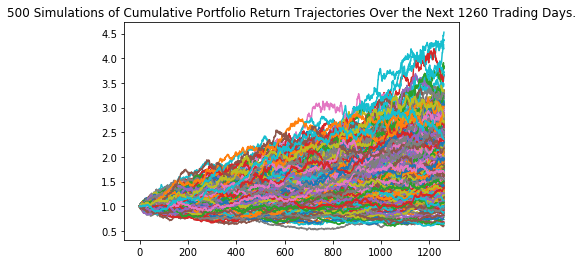

In [161]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_5 = MC_even_dist_5.plot_simulation()

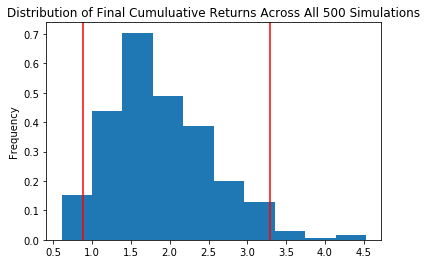

In [162]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_5 = MC_even_dist_5.plot_distribution()

In [163]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_5 = MC_even_dist_5.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_5)

count           500.000000
mean              1.890869
std               0.652374
min               0.607846
25%               1.441506
50%               1.774534
75%               2.299770
max               4.527046
95% CI Lower      0.881153
95% CI Upper      3.292220
Name: 1260, dtype: float64


In [164]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_5 = 30000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(even_tbl_5[8]*initial_investment_5,2)
ci_upper_five = round(even_tbl_5[9]*initial_investment_5,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $26434.6 and $98766.61


### Ten Years Retirement Option

In [165]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80 ],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [166]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987399,0.999316,0.981874,1.006589,0.997041,1.008576,1.001911,1.011396,0.994277,1.002594,...,1.014383,1.011113,0.997227,1.003486,1.020727,0.993642,1.000310,1.011194,0.987912,1.007434
2,0.985010,1.002854,0.991588,0.997819,0.999622,1.008056,1.007312,1.013074,0.989495,0.990458,...,1.029470,1.020775,1.000593,0.999465,1.016815,0.991416,1.006931,1.012613,0.999836,1.014988
3,0.981557,1.010194,0.983228,0.996577,1.000498,1.012540,1.005715,1.017641,0.996706,0.980422,...,1.038416,1.029569,1.012764,1.003744,1.017993,1.001961,0.990930,1.008266,1.003029,1.014382
4,0.986124,1.002402,0.995298,1.023288,0.990726,1.013932,0.999571,1.015375,0.992360,0.990346,...,1.040442,1.027912,1.022410,1.037333,1.008765,1.002285,0.995733,1.006967,1.026378,1.000266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.635346,3.839636,4.365305,2.605796,4.964000,3.512786,5.901266,0.791680,2.942908,18.890782,...,3.259515,3.548151,2.272114,6.731243,5.299230,6.988280,5.041868,8.959814,3.379886,10.954588
2517,3.686653,3.873192,4.403608,2.639033,4.974720,3.509410,5.847634,0.790513,2.954026,18.866206,...,3.260008,3.565427,2.308351,6.750035,5.317477,6.949437,5.030428,8.989263,3.325299,11.012431
2518,3.698413,3.908732,4.471281,2.640689,5.012515,3.521873,5.816442,0.791461,2.922610,18.698703,...,3.229803,3.616142,2.291929,6.807302,5.226870,6.906107,4.951971,8.979470,3.344413,10.999681
2519,3.694870,3.919680,4.488873,2.614749,4.940142,3.531534,5.791104,0.795143,2.917052,18.668790,...,3.286436,3.589437,2.290947,6.840663,5.221418,6.832350,4.944366,8.961949,3.359353,10.813281


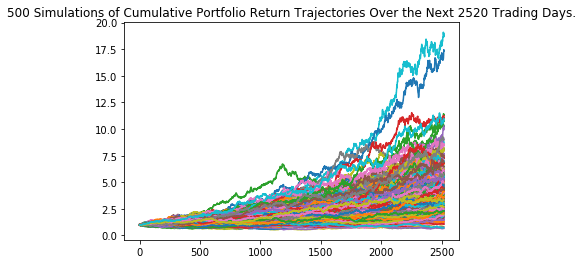

In [167]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10 = MC_even_dist_10.plot_simulation()

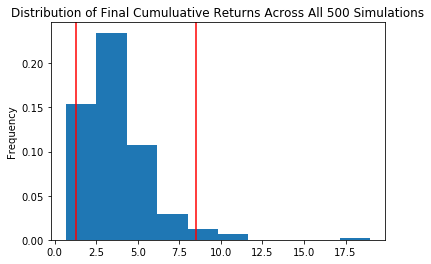

In [168]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_10 = MC_even_dist_10.plot_distribution()

In [169]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_10 = MC_even_dist_10.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_10)

count           500.000000
mean              3.766362
std               2.026608
min               0.667417
25%               2.386147
50%               3.301092
75%               4.584996
max              18.982282
95% CI Lower      1.310815
95% CI Upper      8.492406
Name: 2520, dtype: float64


In [170]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_10 = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl_10[8]*initial_investment_10,2)
ci_upper_ten = round(even_tbl_10[9]*initial_investment_10,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $39324.45 and $254772.17
